In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

#Generate Synthetic Dataset

In [ ]:
def generate_data(m, d, k):
    np.random.seed(123)
    A = np.random.randn(m, d)

    np.random.seed(42)
    X = np.random.randn(d, k)

    np.random.seed(1234)
    E = np.random.randn(m, k)

    return A, X, E

#Gradient and loss function

In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
#Calculate partial derivative
def gradient_JC(input, W, label, exp_AX, sum_exp, j, c):
    gradient = np.sum(input[:, j] * (exp_AX[:, c] / sum_exp))
    mask = (label == c)
    gradient -= np.sum(input[mask, j])
    return gradient

#Calculate Gradient
def gradient(input, W, label, exp_AX, sum_exp):
    gradients = np.zeros_like(W)
    for j in range(W.shape[0]):
        for c in range(W.shape[1]):
            gradients[j, c] = gradient_JC(input, W, label, exp_AX, sum_exp, j, c)
    return gradients

#Calculate objective function
def loss_function(AX, sum_exp, label):
    loss = np.sum(-np.log(softmax(AX)[np.arange(len(label)), label]))
    return loss

#Calculate Accuracy
def calculate_accuracy(input, W, label):
    AW = input @ W
    predictions = np.argmax(AW, axis=1)
    accuracy = np.mean(predictions == label)
    return accuracy

In [ ]:
# Generate random data
A, X, E = generate_data(m=1000, d=1000, k=50)
# Generate labels for each class
B = np.argmax((A @ X) + E, axis=1)

##Computing Lipschitz Constant

In [ ]:
# Compute A^T A
G = A[:800,:].T @ A[:800,:]

# Compute the maximum eigenvalue of G
L = np.linalg.eigvalsh(G).max()
L

3558.752690671444

##GD

In [ ]:
# Set the step size using the Lipschitz constant
step_size = 1 / L
EPSILON = 1e-10
max_iter = 300

# Initialize W
W = np.ones((1000, 50))

losses_train_GD = []
losses_test_GD = []
accuracies_train_GD = [calculate_accuracy(A[:800,:], W, B[:800])]
accuracies_test_GD = [calculate_accuracy(A[800:,:], W, B[800:])]
cpu_times = [0]
start_time = time.time()

for n in range(max_iter):
    AW = A[:800,:] @ W
    exp_AW = np.exp(AW)
    sum_exp = exp_AW.sum(axis=1)

    U = gradient(A[:800,:], W, B[:800], exp_AW, sum_exp)
    W = W - (step_size * U)


    loss_train = loss_function(A[:800,:] @ W, np.exp(A[:800,:]@W).sum(axis=1), B[:800])
    losses_train_GD.append(loss_train)
    loss_test = loss_function(A[800:,:] @ W, np.exp(A[800:,:]@W).sum(axis=1), B[800:])
    losses_test_GD.append(loss_test)

    accuracy_train = calculate_accuracy(A[:800,:], W, B[:800])
    accuracies_train_GD.append(accuracy_train)
    accuracy_test = calculate_accuracy(A[800:,:], W, B[800:])
    accuracies_test_GD.append(accuracy_test)

    # Record elapsed time
    elapsed_time = time.time() - start_time
    cpu_times.append(elapsed_time)

    print(f"Iteration {n + 1}, Loss: {loss_train, loss_test}")

    if np.linalg.norm(U) < EPSILON:
        break

print("Optimized W:\n", W)


Iteration 1, Loss: (2893.337566817773, 777.6289820821135)
Iteration 2, Loss: (2662.702143897631, 773.1702429986003)
Iteration 3, Loss: (2438.6791682371995, 769.0279804825218)
Iteration 4, Loss: (2222.435840102751, 765.2017311199802)
Iteration 5, Loss: (2015.3169677680066, 761.6904844620824)
Iteration 6, Loss: (1818.7805074710238, 758.491999214481)
Iteration 7, Loss: (1634.284005808703, 755.6019625532762)
Iteration 8, Loss: (1463.1305663316998, 753.0131180648117)
Iteration 9, Loss: (1306.304157145243, 750.7145697617864)
Iteration 10, Loss: (1164.3381788771198, 748.6914905576792)
Iteration 11, Loss: (1037.2554745159423, 746.9253809749371)
Iteration 12, Loss: (924.5926698332667, 745.3948590140582)
Iteration 13, Loss: (825.4922717590981, 744.0767992025023)
Iteration 14, Loss: (738.8290228850225, 742.9475616820174)
Iteration 15, Loss: (663.3374257205115, 741.9840821952696)
Iteration 16, Loss: (597.7185922614931, 741.1646889832847)
Iteration 17, Loss: (540.7175980044511, 740.469613400975)
It

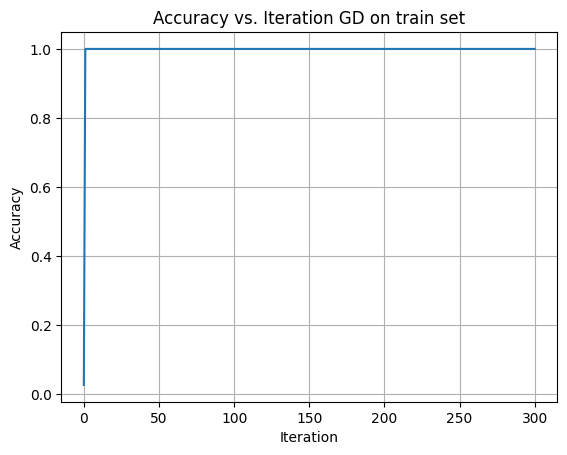

In [ ]:
# Plot accuracy versus iteration
plt.plot(accuracies_train_GD)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration GD on train set')
plt.grid(True)
plt.show()

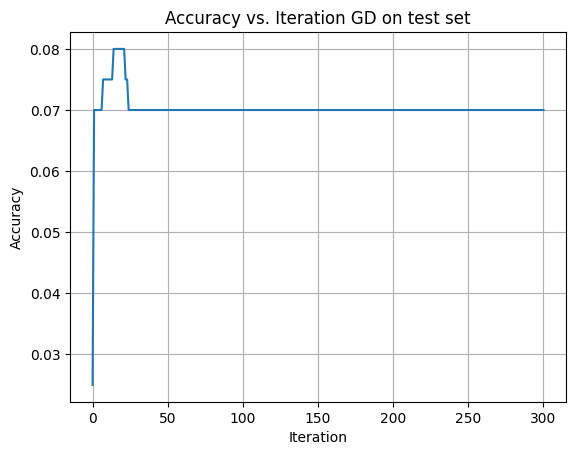

In [ ]:
# Plot accuracy versus iteration
plt.plot(accuracies_test_GD)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration GD on test set')
plt.grid(True)
plt.show()

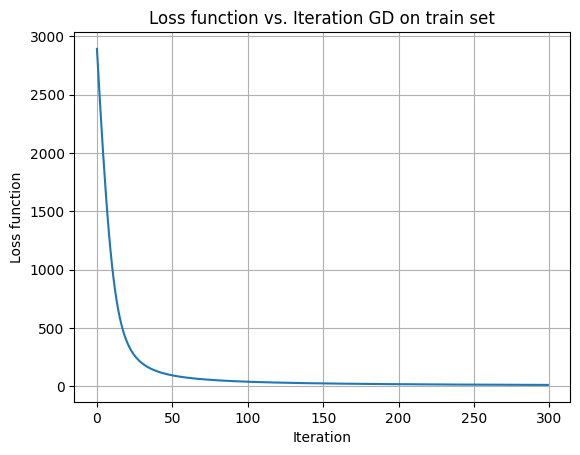

In [ ]:
# Plot accuracy versus iteration
plt.plot(losses_train_GD)
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.title('Loss function vs. Iteration GD on train set')
plt.grid(True)
plt.show()

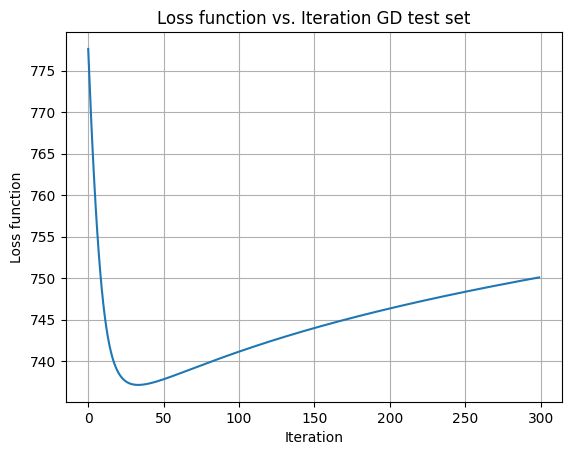

In [ ]:
# Plot accuracy versus iteration
plt.plot(losses_test_GD)
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.title('Loss function vs. Iteration GD test set')
plt.grid(True)
plt.show()

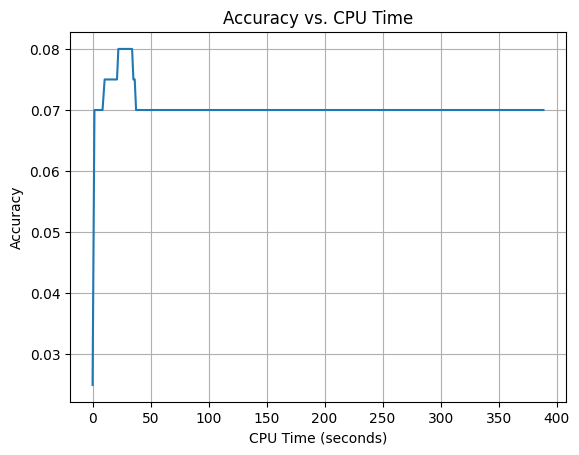

In [ ]:
plt.plot(cpu_times, accuracies_test_GD)
plt.xlabel('CPU Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. CPU Time')
plt.grid(True)
plt.show()

##BCGD_Lipschitz constant stepsize

In [ ]:
# Initialize X
W = np.ones((1000, 50))

EPSILON = 1e-10
max_iter = 300


losses_train_BCGD_L = []
losses_test_BCGD_L = []
accuracies_train_BCGD_L = [calculate_accuracy(A[:800,:], W, B[:800])]
accuracies_test_BCGD_L = [calculate_accuracy(A[800:,:], W, B[800:])]
cpu_times_BCGD_L = [0]
start_time = time.time()

for n in range(max_iter):
    AW = A[:800,:] @ W
    exp_AW = np.exp(AW)
    sum_exp = exp_AW.sum(axis=1)

    U = gradient(A[:800,:], W, B[:800], exp_AW, sum_exp)

    # Compute the gradient for each block (column)
    block_gradients = np.linalg.norm(U, axis=0)
    max_block_idx = np.argmax(block_gradients)

    # Update the selected block (column) using Lipschitz constant
    step_size = 1 / L
    W[:, max_block_idx] -= step_size * U[:, max_block_idx]

    # Compute the new loss
    loss_train = loss_function(A[:800,:] @ W, np.exp(A[:800,:]@W).sum(axis=1), B[:800])
    losses_train_BCGD_L.append(loss_train)
    loss_test = loss_function(A[800:,:] @ W, np.exp(A[800:,:]@W).sum(axis=1), B[800:])
    losses_test_BCGD_L.append(loss_test)

    accuracy_train = calculate_accuracy(A[:800,:], W, B[:800])
    accuracies_train_BCGD_L.append(accuracy_train)
    accuracy_test = calculate_accuracy(A[800:,:], W, B[800:])
    accuracies_test_BCGD_L.append(accuracy_test)

    # Record elapsed time
    elapsed_time = time.time() - start_time
    cpu_times_BCGD_L.append(elapsed_time)

    print(f"Iteration {n + 1}, Loss: {loss_train, loss_test}")

    # Check for convergence
    if np.linalg.norm(U) < EPSILON:
        break

print("Optimized W:\n", W)

Iteration 1, Loss: (3122.239652687237, 782.1867563910155)
Iteration 2, Loss: (3115.0397286639427, 781.9805620104818)
Iteration 3, Loss: (3107.944039821283, 781.9603341983334)
Iteration 4, Loss: (3100.957279379602, 781.7660415865187)
Iteration 5, Loss: (3094.027901014598, 781.7533180547772)
Iteration 6, Loss: (3087.226313256885, 781.5634053738395)
Iteration 7, Loss: (3080.4959904031975, 781.3813305960421)
Iteration 8, Loss: (3073.760859788297, 781.3759342443941)
Iteration 9, Loss: (3067.019593277415, 781.0285868216647)
Iteration 10, Loss: (3060.2880084596463, 780.7898250315866)
Iteration 11, Loss: (3053.656054653665, 780.609685774866)
Iteration 12, Loss: (3047.062643721469, 780.3932023777888)
Iteration 13, Loss: (3040.478077578494, 780.0567333181743)
Iteration 14, Loss: (3033.901850432707, 779.8293131163806)
Iteration 15, Loss: (3027.3600499738013, 779.7787765164976)
Iteration 16, Loss: (3020.856388133444, 779.7806284563113)
Iteration 17, Loss: (3014.4348708881885, 779.6110624293385)
It

#BCGD_Block Lipschitz stepsize

In [ ]:
#WE assume each column of W is treated as a block
num_blocks = 50

# Initialize W
W = np.ones((1000, 50))

# we Compute Lipschitz constant for each block
block_Ls = []
for c in range(num_blocks):
    A_block = A[:800, c].reshape(-1, 1)  # Select one column as a block
    G_block = A_block.T @ A_block
    L_block = np.linalg.eigvalsh(G_block).max()
    block_Ls.append(L_block)

block_Ls = np.array(block_Ls)

# Set the step size for each block
step_sizes = 1 / block_Ls

EPSILON = 1e-10
max_iter = 300

losses_train_BCGD_BL = []
losses_test_BCGD_BL = []
accuracies_train_BCGD_BL = [calculate_accuracy(A[:800, :], W, B[:800])]
accuracies_test_BCGD_BL = [calculate_accuracy(A[800:,:],W,B[800:])]
cpu_times_BCGD_BL = [0]
start_time = time.time()

for n in range(max_iter):
    AW = A[:800, :] @ W
    exp_AW = np.exp(AW)
    sum_exp = exp_AW.sum(axis=1)

    U = gradient(A[:800, :], W, B[:800], exp_AW, sum_exp)

    # Compute the gradient norm for each block (column)
    block_gradients = np.linalg.norm(U, axis=0)
    max_block_idx = np.argmax(block_gradients)

    # Update the selected block (column) using the block-specific Lipschitz constant
    W[:, max_block_idx] -= step_sizes[max_block_idx] * U[:, max_block_idx]

    # Compute the new loss
    loss_train = loss_function(A[:800, :] @ W, np.exp(A[:800, :] @ W).sum(axis=1), B[:800])
    losses_train_BCGD_BL.append(loss_train)
    loss_test = loss_function(A[800:, :] @ W, np.exp(A[800:, :] @ W).sum(axis=1), B[800:])
    losses_test_BCGD_BL.append(loss_test)

    accuracy_train = calculate_accuracy(A[:800, :], W, B[:800])
    accuracies_train_BCGD_BL.append(accuracy_train)
    accuracy_test = calculate_accuracy(A[800:, :], W, B[800:])
    accuracies_test_BCGD_BL.append(accuracy_test)

    # Record elapsed time
    elapsed_time = time.time() - start_time
    cpu_times_BCGD_BL.append(elapsed_time)

    print(f"Iteration {n + 1}, Loss: {loss_train, loss_test}")

    # Check for convergence
    if np.linalg.norm(U) < EPSILON:
        break

print("Optimized W:\n", W)


Iteration 1, Loss: (3097.1732487419813, 781.4942268820766)
Iteration 2, Loss: (3068.4476361506495, 781.4567665830511)
Iteration 3, Loss: (3039.6044133713067, 780.6874470666634)
Iteration 4, Loss: (3008.646145198245, 779.1071499928664)
Iteration 5, Loss: (2980.136786141793, 778.1316801514928)
Iteration 6, Loss: (2952.102093948304, 777.2391964507224)
Iteration 7, Loss: (2922.741449318324, 777.0675362288457)
Iteration 8, Loss: (2893.5758880227845, 776.5371599163911)
Iteration 9, Loss: (2867.657666165937, 775.8825333973837)
Iteration 10, Loss: (2839.788947088063, 775.5310712535291)
Iteration 11, Loss: (2815.6135398236884, 775.619491954036)
Iteration 12, Loss: (2789.0767717233266, 775.2719655730484)
Iteration 13, Loss: (2762.2777953512277, 774.6245578888753)
Iteration 14, Loss: (2738.925803528372, 773.8896443142783)
Iteration 15, Loss: (2715.013709646255, 773.228470034443)
Iteration 16, Loss: (2691.8326201118343, 772.6506987635993)
Iteration 17, Loss: (2667.7443254729033, 772.6760613537708)

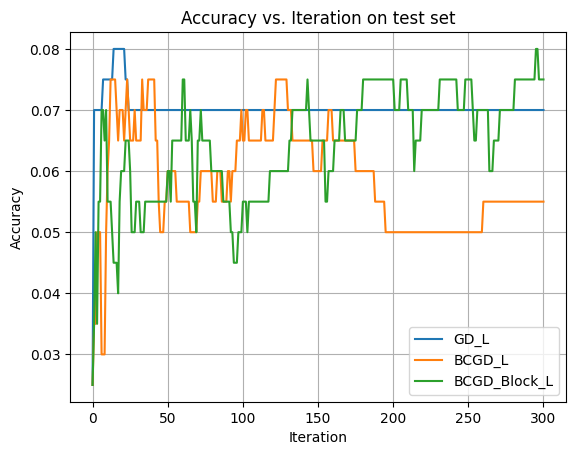

In [ ]:
import matplotlib.pyplot as plt

# Plot both loss functions versus iteration on the same plot
plt.plot(accuracies_test_GD, label='GD_L')
plt.plot(accuracies_test_BCGD_L, label='BCGD_L')
plt.plot(accuracies_test_BCGD_BL, label='BCGD_Block_L')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration on test set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()


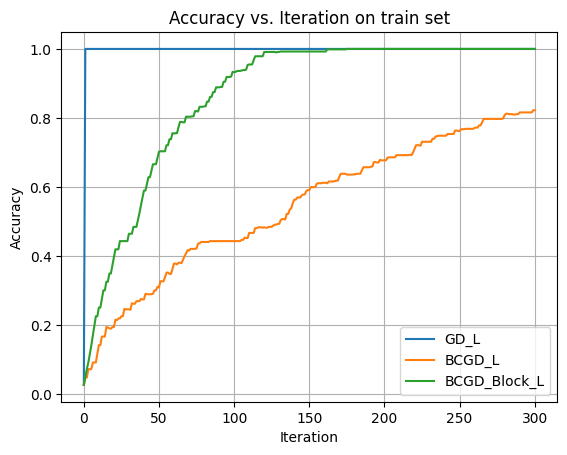

In [ ]:
import matplotlib.pyplot as plt

# Plot both loss functions versus iteration on the same plot
plt.plot(accuracies_train_GD, label='GD_L')
plt.plot(accuracies_train_BCGD_L, label='BCGD_L')
plt.plot(accuracies_train_BCGD_BL, label='BCGD_Block_L')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration on train set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()


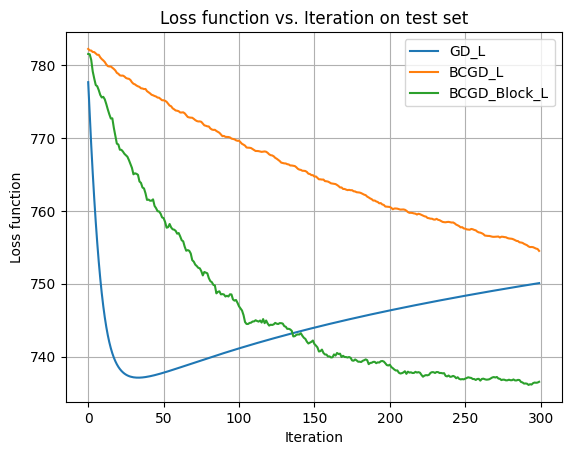

In [ ]:
plt.plot(losses_test_GD, label='GD_L')
plt.plot(losses_test_BCGD_L, label='BCGD_L')
plt.plot(losses_test_BCGD_BL, label='BCGD_Block_L')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.title('Loss function vs. Iteration on test set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()


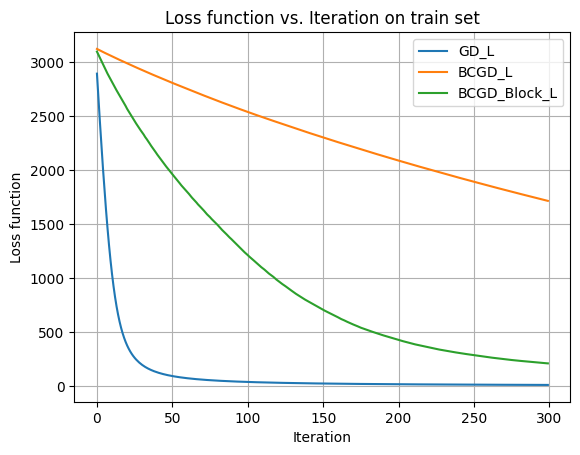

In [ ]:
plt.plot(losses_train_GD, label='GD_L')
plt.plot(losses_train_BCGD_L, label='BCGD_L')
plt.plot(losses_train_BCGD_BL, label='BCGD_Block_L')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.title('Loss function vs. Iteration on train set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()

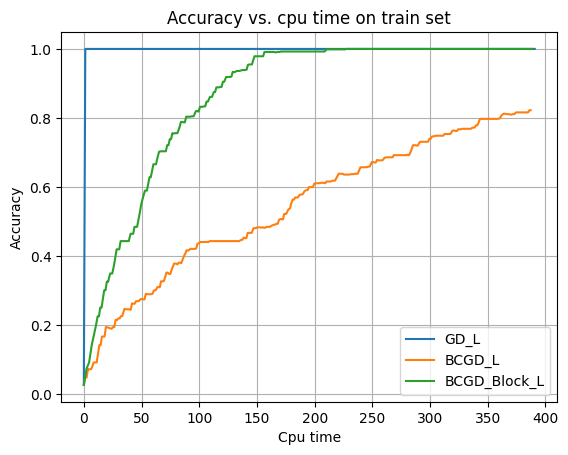

In [ ]:
import matplotlib.pyplot as plt

# Plot both loss functions versus iteration on the same plot
plt.plot(cpu_times, accuracies_train_GD, label='GD_L')
plt.plot(cpu_times_BCGD_L, accuracies_train_BCGD_L, label='BCGD_L')
plt.plot(cpu_times_BCGD_BL, accuracies_train_BCGD_BL, label='BCGD_Block_L')

# Set labels and title
plt.xlabel('Cpu time')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. cpu time on train set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()


#Real Dataset

##Uploadin Data

In [ ]:
# Read CSV files
df = pd.read_csv("/content/sample_data/fashion-mnist_train.csv")
df_test = pd.read_csv("/content/sample_data/fashion-mnist_test.csv")

# Split data into features and labels
A_train = df.iloc[:, 1:785].values
B_train = df.iloc[:, 0].values
A_test = df_test.iloc[:, 1:785].values
B_test = df_test.iloc[:, 0].values


(10000, 785)

##Functions

In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Calculate partial derivative
def gradient_JC(input, W, label, exp_AX, sum_exp, j, c):
    gradient = np.sum(input[:, j] * (exp_AX[:, c] / sum_exp))
    mask = (label == c)
    gradient -= np.sum(input[mask, j])
    return gradient

# Calculate Gradient
def gradient(input, W, label, exp_AX, sum_exp):
    gradients = np.zeros_like(W)
    for j in range(W.shape[0]):
        for c in range(W.shape[1]):
            gradients[j, c] = gradient_JC(input, W, label, exp_AX, sum_exp, j, c)
    return gradients

# Calculate objective function
def loss_function(AX, sum_exp, label):
    loss = np.sum(-np.log(softmax(AX)[np.arange(len(label)), label]))
    return loss

# Calculate Accuracy
def calculate_accuracy(input, W, label):
    AW = input @ W
    predictions = np.argmax(AW, axis=1)
    accuracy = np.mean(predictions == label)
    return accuracy

## Computing Lipschitz Constant

In [ ]:
# Compute A^T A
G = A_train.T @ A_train

# Compute the maximum eigenvalue of G
L = np.linalg.eigvalsh(G).max()
L

430123852887.4901

##GD

In [ ]:
# Set the step size using the Lipschitz constant
step_size = 1 / L
EPSILON = 1e-10
max_iter = 500

# Initialize W
W = np.zeros((784, 10))

losses_train_GD = []
losses_test_GD = []
accuracies_train_GD = [calculate_accuracy(A_train, W, B_train)]
accuracies_test_GD = [calculate_accuracy(A_test, W, B_test)]
cpu_times = [0]
start_time = time.time()

for n in range(max_iter):
    AW = A_train @ W
    exp_AW = np.exp(AW)
    sum_exp = exp_AW.sum(axis=1)

    U = gradient(A_train, W, B_train, exp_AW, sum_exp)
    W = W - (step_size * U)

    loss_train = loss_function(A_train @ W, np.exp(A_train @ W).sum(axis=1), B_train)
    losses_train_GD.append(loss_train)
    loss_test = loss_function(A_test @ W, np.exp(A_test @ W).sum(axis=1), B_test)
    losses_test_GD.append(loss_test)

    accuracy_train = calculate_accuracy(A_train, W, B_train)
    accuracies_train_GD.append(accuracy_train)
    accuracy_test = calculate_accuracy(A_test, W, B_test)
    accuracies_test_GD.append(accuracy_test)

    # Record elapsed time
    elapsed_time = time.time() - start_time
    cpu_times.append(elapsed_time)

    print(f"Iteration {n+1}, Loss: {loss_train, loss_test}")

    if np.linalg.norm(U) < EPSILON:
        break

print("Optimized W:\n", W)


Iteration 1, Loss: (136709.060749958, 22783.75345953287)
Iteration 2, Loss: (135350.6785458079, 22556.36638456062)
Iteration 3, Loss: (134065.13900426848, 22341.206824927493)
Iteration 4, Loss: (132840.85529360216, 22136.33303086512)
Iteration 5, Loss: (131668.70287325623, 21940.215374876127)
Iteration 6, Loss: (130541.45129496025, 21751.64128218689)
Iteration 7, Loss: (129453.33839371787, 21569.643997337305)
Iteration 8, Loss: (128399.74694515801, 21393.44849640886)
Iteration 9, Loss: (127376.95661191836, 21222.429992970297)
Iteration 10, Loss: (126381.95217767975, 21056.081856953573)
Iteration 11, Loss: (125412.27444778782, 20893.990667475176)
Iteration 12, Loss: (124465.90383496355, 20735.816730283062)
Iteration 13, Loss: (123541.16918043901, 20581.278814356876)
Iteration 14, Loss: (122636.6761694134, 20430.14216477973)
Iteration 15, Loss: (121751.25102230207, 20282.209070166944)
Iteration 16, Loss: (120883.89612942628, 20137.31142778115)
Iteration 17, Loss: (120033.7550433893, 1999

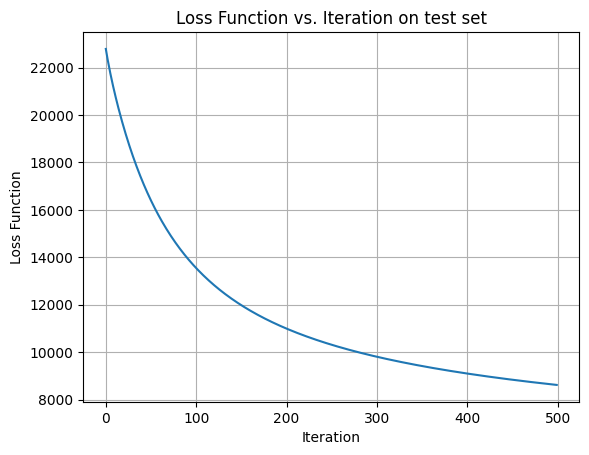

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses_test_GD)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('Loss Function vs. Iteration on test set')
plt.grid(True)


# Show the plot
plt.show()

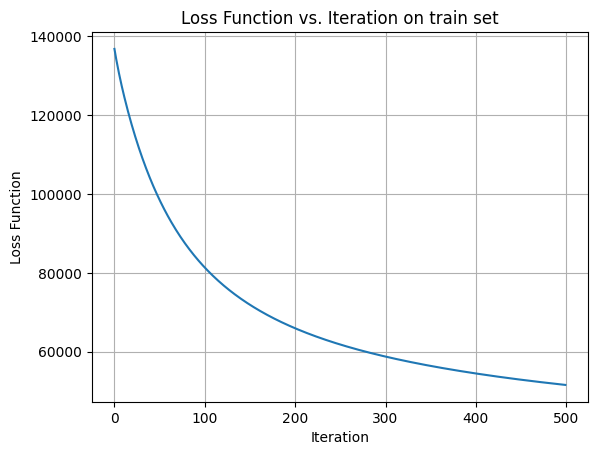

In [ ]:
plt.plot(losses_train_GD)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('Loss Function vs. Iteration on train set')
plt.grid(True)


# Show the plot
plt.show()

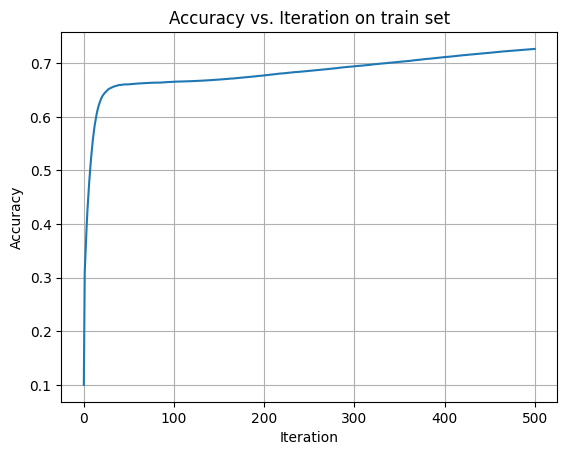

In [ ]:
plt.plot(accuracies_train_GD)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration on train set')
plt.grid(True)


# Show the plot
plt.show()

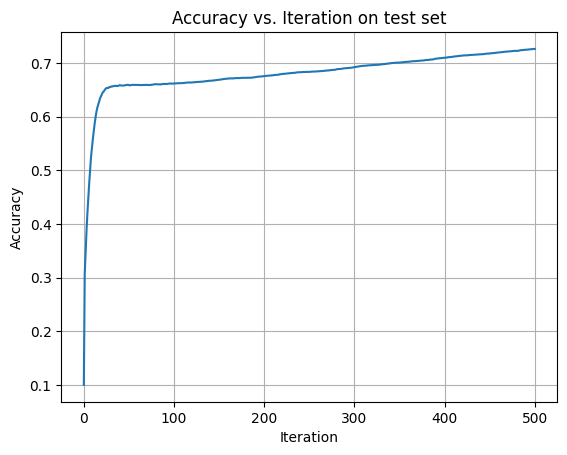

In [ ]:
plt.plot(accuracies_test_GD)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration on test set')
plt.grid(True)


# Show the plot
plt.show()

##BCGD_Lipschitz constant stepsize

In [ ]:
W = np.zeros((784, 10))
EPSILON = 1e-10
max_iter = 500



losses_train_BCGD_L = []
losses_test_BCGD_L = []
accuracies_train_BCGD_L = [calculate_accuracy(A_train, W, B_train)]
accuracies_test_BCGD_L = [calculate_accuracy(A_test, W, B_test)]
cpu_times_BCGD_L = [0]
start_time = time.time()

for n in range(max_iter):
    AW = A_train @ W
    exp_AW = np.exp(AW)
    sum_exp = exp_AW.sum(axis=1)

    U = gradient(A_train, W, B_train, exp_AW, sum_exp)

    # Compute the gradient for each block (column)
    block_gradients = np.linalg.norm(U, axis=0)
    max_block_idx = np.argmax(block_gradients)

    # Update the selected block (column) using Lipschitz constant
    step_size = 1 / L
    W[:, max_block_idx] -= step_size * U[:, max_block_idx]

    # Compute the new loss
    loss_train = loss_function(A_train @ W, np.exp(A_train @ W).sum(axis=1), B_train)
    losses_train_BCGD_L.append(loss_train)
    loss_test = loss_function(A_test @ W, np.exp(A_test @ W).sum(axis=1), B_test)
    losses_test_BCGD_L.append(loss_test)

    accuracy_train = calculate_accuracy(A_train, W, B_train)
    accuracies_train_BCGD_L.append(accuracy_train)
    accuracy_test = calculate_accuracy(A_test, W, B_test)
    accuracies_test_BCGD_L.append(accuracy_test)

    # Record elapsed time
    elapsed_time = time.time() - start_time
    cpu_times_BCGD_L.append(elapsed_time)

    print(f"Iteration {n}, Loss_BCGD_L: {loss_train, loss_test}")

    # Check for convergence
    if np.linalg.norm(U) < EPSILON:
        break

print("Optimized W:\n", W)

Spectral norm of A: 655838.2825723815
Lipschitz constant L: 430123852887.49097
Iteration 0, Loss_BCGD_L: (137921.68814096128, 22987.062456548956)
Iteration 1, Loss_BCGD_L: (137704.24357753282, 22950.934017402422)
Iteration 2, Loss_BCGD_L: (137489.44898515998, 22915.32037290703)
Iteration 3, Loss_BCGD_L: (137278.103573049, 22880.2858986347)
Iteration 4, Loss_BCGD_L: (137070.19403923806, 22845.82776653773)
Iteration 5, Loss_BCGD_L: (136865.18927856418, 22811.766383912796)
Iteration 6, Loss_BCGD_L: (136665.87775051728, 22778.54068247777)
Iteration 7, Loss_BCGD_L: (136460.99324395694, 22744.57270183716)
Iteration 8, Loss_BCGD_L: (136259.53976591106, 22711.180850954373)
Iteration 9, Loss_BCGD_L: (136061.49654985315, 22678.361056648184)
Iteration 10, Loss_BCGD_L: (135865.13337179337, 22645.734422918616)
Iteration 11, Loss_BCGD_L: (135667.6295631403, 22612.404122712713)
Iteration 12, Loss_BCGD_L: (135473.04356325165, 22580.155838370993)
Iteration 13, Loss_BCGD_L: (135280.58861894585, 22547.66

##Visualisation

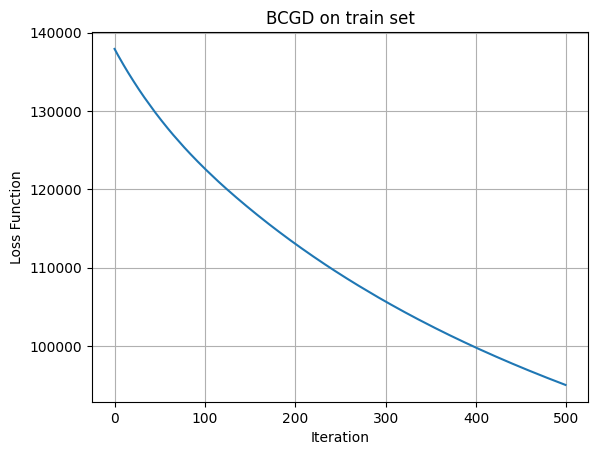

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses_train_BCGD_L)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('BCGD on train set')
plt.grid(True)


# Show the plot
plt.show()

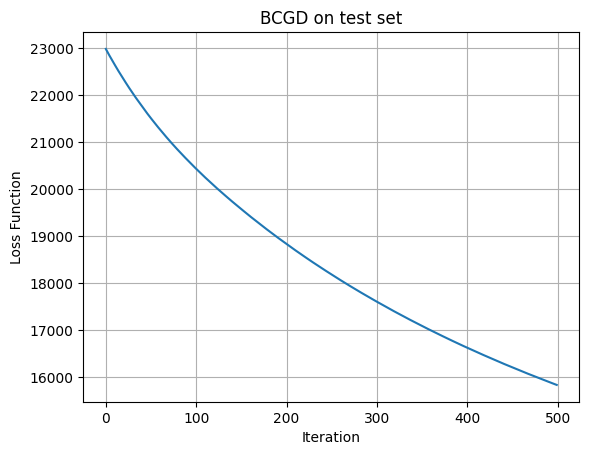

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses_test_BCGD_L)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('BCGD on test set')
plt.grid(True)


# Show the plot
plt.show()

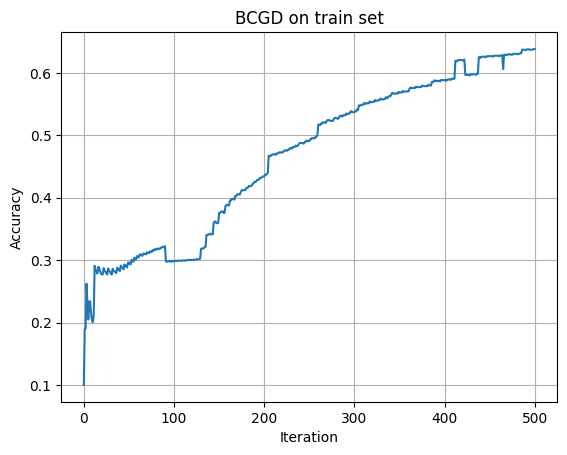

In [ ]:
import matplotlib.pyplot as plt
plt.plot(accuracies_train_BCGD)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('BCGD on train set')
plt.grid(True)


# Show the plot
plt.show()

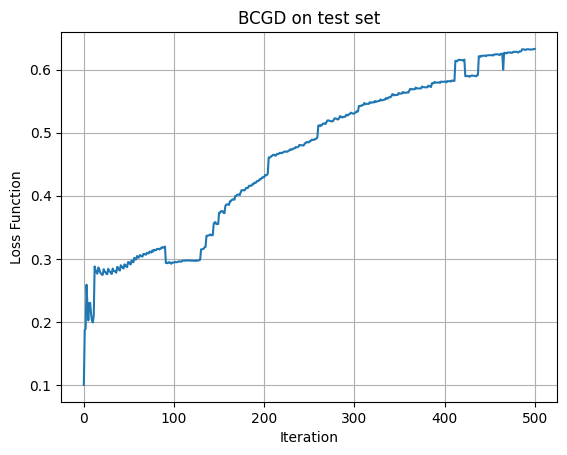

In [ ]:
import matplotlib.pyplot as plt
plt.plot(accuracies_test_BCGD)

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('BCGD on test set')
plt.grid(True)


# Show the plot
plt.show()

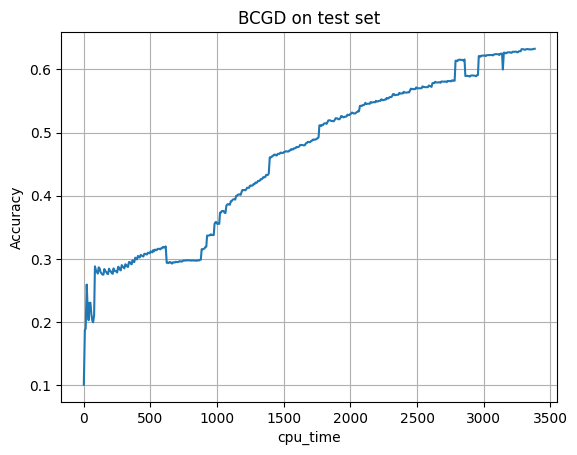

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cpu_times, accuracies_test_BCGD_L)

# Set labels and title
plt.xlabel('cpu_time')
plt.ylabel('Accuracy')
plt.title('BCGD on test set')
plt.grid(True)


# Show the plot
plt.show()

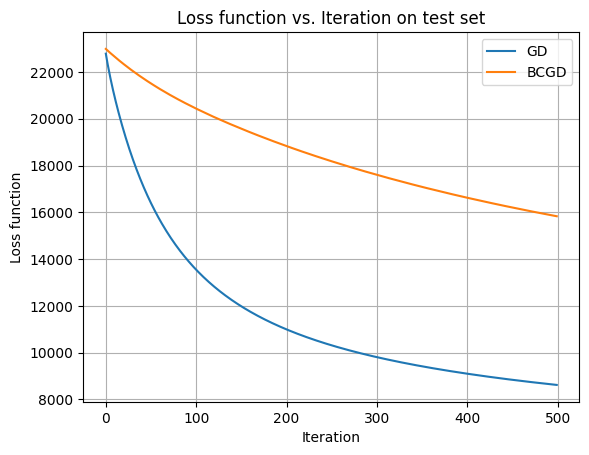

In [ ]:

plt.plot(losses_test_GD, label='GD')
plt.plot(losses_test_BCGD_L, label='BCGD')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.title('Loss function vs. Iteration on test set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()

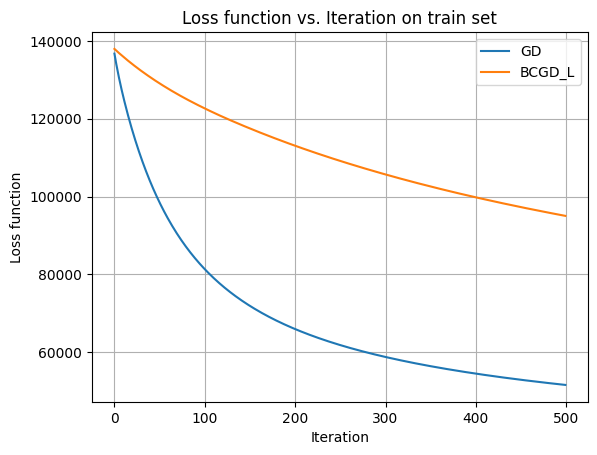

In [ ]:
plt.plot(losses_train_GD, label='GD')
plt.plot(losses_train_BCGD_L, label='BCGD_L')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.title('Loss function vs. Iteration on train set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()

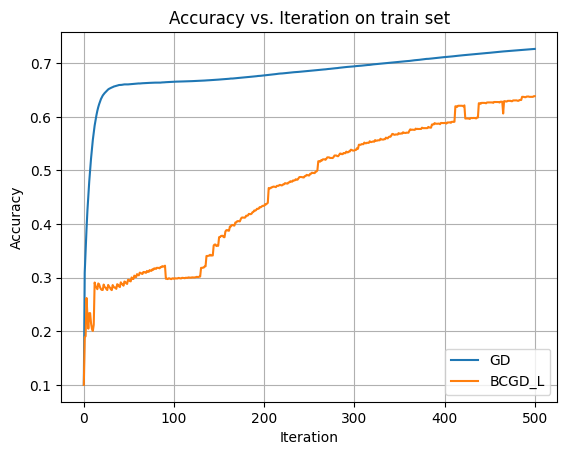

In [ ]:
plt.plot(accuracies_train_GD, label='GD')
plt.plot(accuracies_train_BCGD_L, label='BCGD_L')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration on train set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()

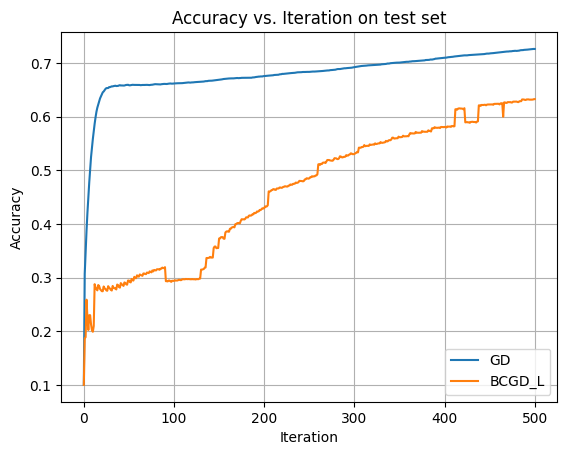

In [ ]:
plt.plot(accuracies_test_GD, label='GD')
plt.plot(accuracies_test_BCGD_L, label='BCGD_L')

# Set labels and title
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration on test set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()

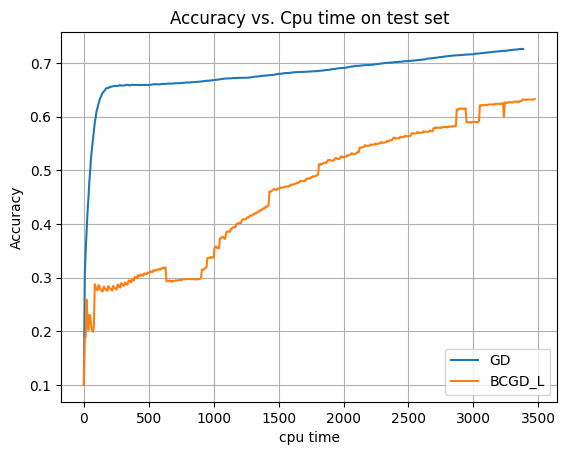

In [ ]:
plt.plot(cpu_times, accuracies_test_GD, label='GD')
plt.plot(cpu_times_BCGD_L, accuracies_test_BCGD_L, label='BCGD_L')

# Set labels and title
plt.xlabel('cpu time')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Cpu time on test set')

# Add grid
plt.grid(True)

# Add a legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()